# Redshift Data of DESIJ0618+5018

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 31.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata(
    "/kaggle/input/fits-file/DESIJ06185018_F140W_drz_sci.fits", header=True
)

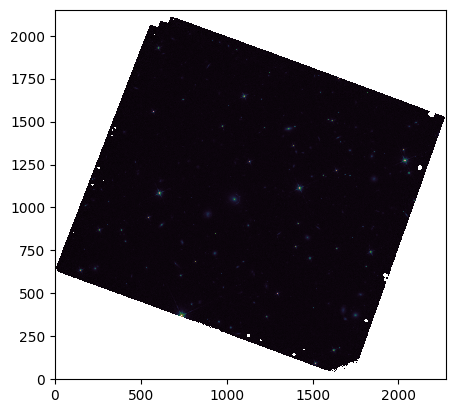

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [ ]:
# need to be changed for each cluster file
FILENAME = "/kaggle/input/phot-z/photo_z_DESIJ06185018.csv"
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.009564,8001585060003503,94.560186,50.296384,8001,585060,3503,EXP,0.001,E8,0.536,0.097,1,1
1,0.007999,8001585060003587,94.562101,50.297839,8001,585060,3587,REX,0.475,R4,0.408,0.094,1,1
2,0.008713,8001585060003588,94.563210,50.297132,8001,585060,3588,EXP,0.003,E6,0.642,0.111,1,1
3,0.009305,8001585060003608,94.551477,50.299749,8001,585060,3608,PSF,1.000,P2,0.837,0.462,1,0
4,0.007962,8001585060003609,94.551007,50.302751,8001,585060,3609,PSF,1.000,P2,0.850,0.513,1,0


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 94.5625000, 50.3058333  # RA 06:18:15 DEC 50:18:21
radii = 70  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

524.2294915081656 1641.8896158079972


In [8]:
data_legacy_cropped = data_legacy[
    (data_legacy["RAJ2000"] < x_upper)
    & (data_legacy["RAJ2000"] > x_lower)
    & (data_legacy["DEJ2000"] < y_upper)
    & (data_legacy["DEJ2000"] > y_lower)
]

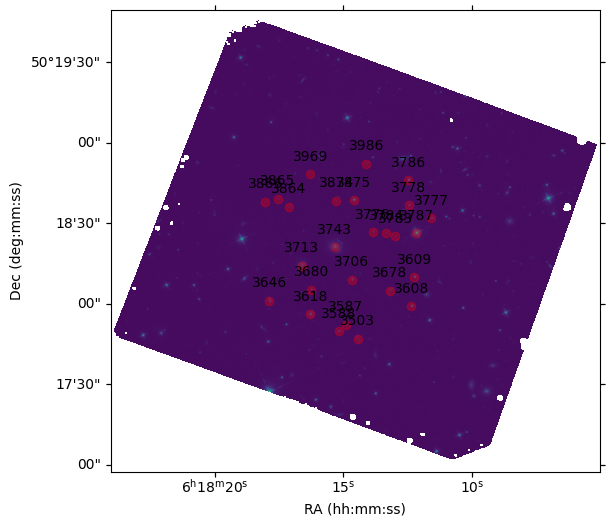

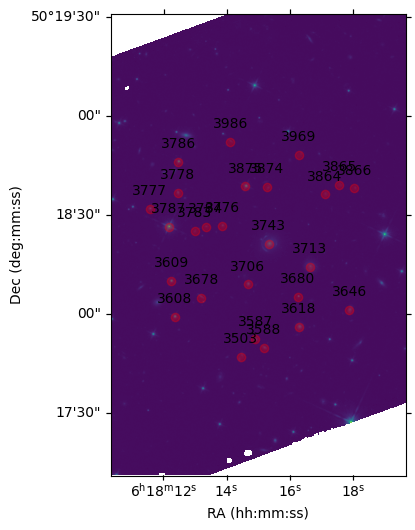

In [9]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [10]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 3743
object_ids = [central_deflector_id, 3706, 3713, 3874, 3875]

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r    RAJ2000    DEJ2000  type  pstar gmmcomp  zphot  e_zphot
objid                                                                     
3706   0.003455  94.561110  50.302494   REX  0.005      R6  0.696    0.177
3713   0.004716  94.569271  50.303951   REX  0.014      R3  0.440    0.059
3743   0.000891  94.563893  50.305882  COMP  0.012      C5  0.519    0.077
3874   0.004900  94.563635  50.310679   REX  0.009      R7  0.533    0.168
3875   0.005020  94.560802  50.310734   PSF  0.999      P2  0.551    1.804


In [11]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z)
    | (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.519
del_z: 0.04557
             _r    RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
3587   0.007999  94.562101  50.297839  REX  0.475      R4  0.408    0.094
3588   0.008713  94.563210  50.297132  EXP  0.003      E6  0.642    0.111
3608   0.009305  94.551477  50.299749  PSF  1.000      P2  0.837    0.462
3609   0.007962  94.551007  50.302751  PSF  1.000      P2  0.850    0.513
3618   0.007736  94.567857  50.298895  REX  0.001      R4  0.622    0.242
3678   0.006583  94.554955  50.301348  EXP  0.005      E7  0.618    0.114
3680   0.005500  94.567693  50.301446  PSF  0.428      P2  0.263    0.141
3706   0.003455  94.561110  50.302494  REX  0.005      R6  0.696    0.177
3713   0.004716  94.569271  50.303951  REX  0.014      R3  0.440    0.059
3776   0.003435  94.557738  50.307431  PSF  0.085      P2  0.440    0.137
3777   0.009612  94.548207  50.308842  REX  0.012      R4  0.830    0.097


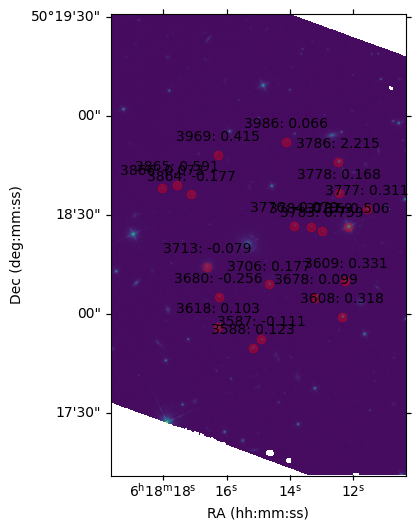

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[
        i
    ]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}",
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file

In [13]:
# Existing YAML file with other parameters
existing_yaml_file = "/kaggle/input/point-estimates/DESIJ06185018_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id, "zphot"]
e_zphot = selected_data_legacy.loc[central_deflector_id, "e_zphot"]

environment_variables = {"z_phot": [z_phot, e_zphot]}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
# with open(existing_yaml_file, "w") as file:
#     yaml.dump(existing_content, file, default_flow_style=False)